In [6]:
from library.functions_to_abstract_data import extract_qm9_data
from sklearn.model_selection import train_test_split
from torch_geometric.datasets import QM9
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the QM9 dataset or install if not already installed
dataset = QM9(root='../data/QM9')

df = extract_qm9_data(dataset)
# Count occurrences of each unique gap value
gap_counts = df['gap'].value_counts()

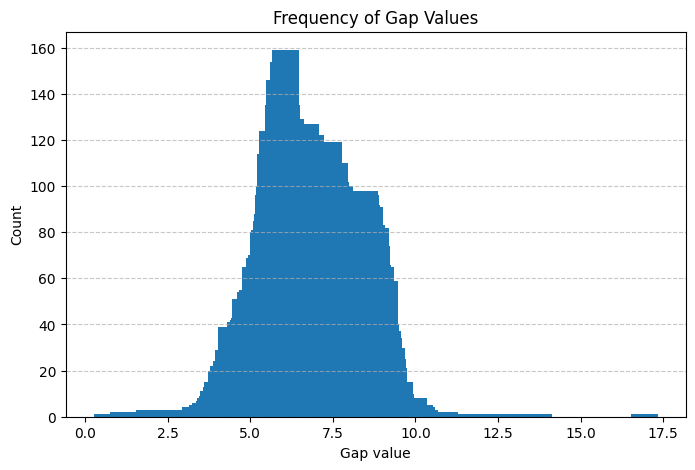

In [3]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(gap_counts.index, gap_counts.values)

# Labels and title
plt.xlabel('Gap value')
plt.ylabel('Count')
plt.title('Frequency of Gap Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Create Stratification Bins

# Option A: Quantile bins (balances number of samples per bin
num_bins = 10  # 10 bins for deciles (tune as needed)
df['gap_bin'] = pd.qcut(df['gap'], q=num_bins, labels=False)

# DOESNT WORK
# # Option B: Fixed-width bins (preserves physical scale)
# bin_width = 2.0  # eV
# bins = np.arange(df['gap'].min(), df['gap'].max() + bin_width, bin_width)
# df['gap_bin'] = np.digitize(df['gap'], bins)

In [24]:
# Stratified Train/Test Split
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['gap_bin']
)

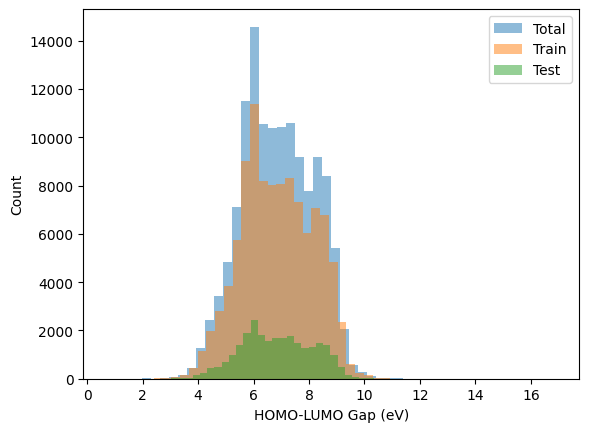

In [25]:
# Verify the Stratification
plt.hist(df['gap'], bins=50, alpha=0.5, label='Total')
plt.hist(train_df['gap'], bins=50, alpha=0.5, label='Train')
plt.hist(test_df['gap'], bins=50, alpha=0.5, label='Test')
plt.xlabel('HOMO-LUMO Gap (eV)')
plt.ylabel('Count')
plt.legend()
plt.show()